# Week 8: Regression and Classification

Given the dataset pid, the column label represents the class label of the record. This week, you need
to apply three different classification techniques to predict the label of each record.
1. Split the dataset into training and testing (75/25 %).
2. Train the model using the training data.
3. Use the model to predict the label of the test data.
4. Compute and display the confusion matrix.
5. Evaluate each classifier using two evaluation metrics (e.g. precision and accuracy)
6. In columns C, D, E and F, the value 0 is not correct, remove those values and use one of the data
imputation techniques that you learnt last week to fill the missing values that resulted from
removing the value 0.
7. Use sampling with stratification to split the data such that each class gets represented by a ratio
that reflects the ratio of the records that belong to the class in the dataset.
8. Check the performance of the model after the imputation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Load df
pid = pd.read_csv("pid.csv")
pid.head()

,A,B,C,D,E,F,G,H,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Split data X and Y (Train and Test)

In [106]:
X = pid.iloc[:,0:7].values #predictors
y = pid.iloc[:,-1].values #response 

#Split with 25% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [107]:
print(len(X_train))
print(len(X_test))

576
192


In [108]:
#Proportion of 1 in train
print("Length of train set %d , number of responses %d, proportion %6.02f" %(len(y_train), y_train.sum(), y_train.sum() / (len(y_train) )))

#Proportion of 1 in test
print("Length of test set %d , number of responses %d, proportion %6.02f" %(len(y_test), y_test.sum(), y_test.sum() / (len(y_test) )))

Length of train set 576 , number of responses 202, proportion   0.35
Length of test set 192 , number of responses 66, proportion   0.34


## Training Models

## Decision Tree



[[98 28]
 [24 42]]


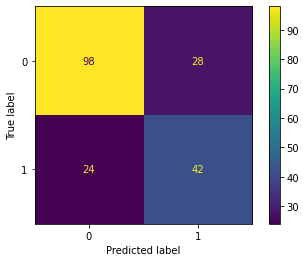

In [109]:

#Fit Model
tree = DecisionTreeClassifier().fit(X_train, y_train)

#Predict Values
y_pred = tree.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(tree, X_test, y_test)

## Random Forest

[[107  19]
 [ 33  33]]


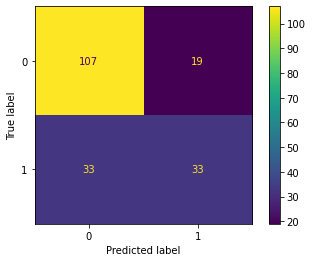

In [110]:

#Fit Model
r_forest = RandomForestClassifier().fit(X_train, y_train)

#Predict Values
y_pred = r_forest.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(r_forest, X_test, y_test)

## KNN


[[118   8]
 [ 50  16]]


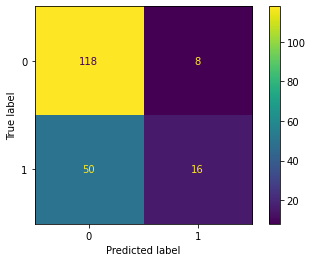

In [111]:
#Fit Model
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

#Predict Values
y_pred = knn.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(knn, X_test, y_test)

In [ ]:
#More Models 



# Evaluating all models considering Acuracy and Precision

## Accuracy = TP + TN / TP + TN + FP + FN
## Precision = TP / TP + FP


In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#Loading all models in a list
models = [tree, r_forest, knn]
acc_models = [] #will be use later to compare with diferent slips
prec_models = [] #will be use later to compare with diferent slips
for i in range(0,len(models)):
    clf = models[i]
    clf.fit(X_train, y_train) #fit again the model
    
    y_pred = clf.predict(X_test)
    print("Model", models[i], "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
    print("Model", models[i],"Precision Score", round(precision_score(y_test, y_pred),2))
    acc_models.append(accuracy_score(y_test, y_pred))
    prec_models.append(precision_score(y_test, y_pred))
    print("\n")

Model DecisionTreeClassifier() Acuracy Score 0.71
Model DecisionTreeClassifier() Precision Score 0.57


Model RandomForestClassifier() Acuracy Score 0.72
Model RandomForestClassifier() Precision Score 0.62


Model KNeighborsClassifier(n_neighbors=2) Acuracy Score 0.7
Model KNeighborsClassifier(n_neighbors=2) Precision Score 0.67




In [113]:
acc_models

[0.7083333333333334, 0.7239583333333334, 0.6979166666666666]

# Looking for 0 in columns C,D,E and F

In [114]:
pid = pd.read_csv("pid.csv")
#pid[(pid["C"] == 0) & (pid["D"] == 0) & (pid["E"] == 0) & (pid["F"] == 0)] = np.nan

In [115]:
index = pid[["C", "D", "E", "F"]][(pid["C"]==0)&(pid["D"]==0)&(pid["F"]==0)]
cols = ["C", "D", "E", "F"]

#change just this values in each col to the mean() -> im considering this MCAR
for i in range(0,len(cols)):
    pid.loc[index.index,cols[i]] = pid.loc[:,cols[i]].mean()

In [116]:
pid.loc[index.index] 

,A,B,C,D,E,F,G,H,Label
49,7,105,69.105469,20.536458,79.799479,31.992578,0.305,24,0
60,2,84,69.105469,20.536458,79.799479,31.992578,0.304,21,0
81,2,74,69.105469,20.536458,79.799479,31.992578,0.102,22,0
426,0,94,69.105469,20.536458,79.799479,31.992578,0.256,25,0
494,3,80,69.105469,20.536458,79.799479,31.992578,0.174,22,0
522,6,114,69.105469,20.536458,79.799479,31.992578,0.189,26,0
706,10,115,69.105469,20.536458,79.799479,31.992578,0.261,30,1


In [117]:
#Lookfing for distribution of responsae classes
pid["Label"].groupby(pid['Label']).count()

Label
0    500
1    268
Name: Label, dtype: int64

In [174]:
#Random sampling to add more Responses classes

#look for the diferences in each response variable
dif_sets = (len(pid[pid["Label"]==1]) - len(pid[pid["Label"]==0]))*-1

#create a copy just for precaution
pid2 = pid.copy()

#random sampling and add at end (only with responsa variable =1)
for i in range(0,dif_sets):
    pid2 = pid2.append(pid[pid["Label"]==1].sample(n=1), ignore_index=True)
    

In [177]:
#Lookfing for distribution of response classes
pid2["Label"].groupby(pid2['Label']).count()

Label
0    500
1    500
Name: Label, dtype: int64

In [181]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

X = pid2.iloc[:,0:7].values #predictors
y = pid2.iloc[:,-1].values #response 

#Split with 25% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#sss = ShuffleSplit(n_splits=5, test_size=.5, random_state=0)
#sss.get_n_splits(X, y)

In [182]:
#Build traind and test with equal proportion
#for train_index, test_index in sss.split(X, y):
#    #print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

In [183]:
#Proportion of in train
print("Length of train set %d , number of responses %d, proportion %6.02f" %(len(y_train), y_train.sum(), y_train.sum() / (len(y_train) )))

#Proportion of in test
print("Length of test set %d , number of responses %d, proportion %6.02f" %(len(y_test), y_test.sum(), y_test.sum() / (len(y_test) )))

Length of train set 750 , number of responses 378, proportion   0.50
Length of test set 250 , number of responses 122, proportion   0.49


In [184]:
from sklearn.metrics import accuracy_score

#Loading all models in a list
models = [tree, r_forest, knn]
modelsnames = ["DecisionTree", "RandomForest", "KNN"]
acc_models2 = []
prec_models2 = []
for i in range(0,len(models)):
    clf = models[i]
    clf.fit(X_train, y_train) #fit again the model
    
    y_pred = clf.predict(X_test)
    print("Model", models[i], "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
    print("Model", models[i], "Precision Score", round(precision_score(y_test, y_pred),2))
    print("\n")
    acc_models2.append(accuracy_score(y_test, y_pred))
    prec_models2.append(precision_score(y_test, y_pred))

Model DecisionTreeClassifier() Acuracy Score 0.8
Model DecisionTreeClassifier() Precision Score 0.77


Model RandomForestClassifier() Acuracy Score 0.8
Model RandomForestClassifier() Precision Score 0.76


Model KNeighborsClassifier(n_neighbors=2) Acuracy Score 0.73
Model KNeighborsClassifier(n_neighbors=2) Precision Score 0.74




In [185]:
#We improve the acuracy and the precision as well 
df_split = pd.DataFrame(data=[acc_models2,acc_models, prec_models2, prec_models], columns=modelsnames, index=["Accuracy_SameSplit", "Accuracy", "Precision_SameSpli", "Precision"])
df_split

,DecisionTree,RandomForest,KNN
Accuracy_SameSplit,0.804000,0.804000,0.728000
Accuracy,0.708333,0.723958,0.697917
Precision_SameSpli,0.770370,0.758865,0.736842
Precision,0.569444,0.618182,0.666667
